# Data Mining project
## 5_fieldsAnalysis - correct to consistent

In this notebook we will analysis and improve consistency of dataset fields

In [23]:
import os
import os.path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from colorama import Fore

In [24]:
pathori = "../Data/Raw/Main/"
pathtemp = "../Data/Interim/"
pathdest = "../Data/Processed/"
filetemp = "main_competitions.csv"
filedest = "main_competitions.csv"

In [25]:
# Open dataset
url = pathtemp + filetemp
parse_dates=["Date"]
ds = pd.read_csv(url, parse_dates=parse_dates, index_col=False)

In [26]:
print("Shape: ", ds.shape)
print("Columns: ", ds.columns)
print("Sample data:")
display(ds.sample(5))

Shape:  (106969, 44)
Columns:  Index(['Country', 'Competition', 'Season', 'Div', 'Date', 'HomeTeam',
       'AwayTeam', 'FTR', 'B365H', 'B365D', 'B365A', 'BSH', 'BSD', 'BSA',
       'BWH', 'BWD', 'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH',
       'LBD', 'LBA', 'SOH', 'SOD', 'SOA', 'SBH', 'SBD', 'SBA', 'SJH', 'SJD',
       'SJA', 'SYH', 'SYD', 'SYA', 'VCH', 'VCD', 'VCA', 'WHH', 'WHD', 'WHA'],
      dtype='object')
Sample data:


,Country,Competition,Season,Div,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,...,SJA,SYH,SYD,SYA,VCH,VCD,VCA,WHH,WHD,WHA
64723,Italy,SerieA,2013-2014,I1,2014-09-03,Lazio,Atalanta,A,1.57,3.8,...,5.50,NaN,NaN,NaN,1.65,3.75,6.5,1.67,3.5,5.50
4423,England,Championship,2005-2006,E1,2005-08-27,Watford,Reading,D,2.60,3.2,...,2.75,NaN,NaN,NaN,2.50,3.20,2.5,2.60,3.1,2.40
6170,England,Championship,2008-2009,E1,2008-10-25,Nott'm Forest,Cardiff,A,2.75,3.4,...,2.38,NaN,NaN,NaN,2.75,3.25,2.3,2.62,3.2,2.30
5846,England,Championship,2007-2008,E1,2008-12-02,Sheffield Weds,Charlton,D,3.00,3.3,...,2.38,NaN,NaN,NaN,2.60,3.25,2.4,2.90,3.2,2.15
53971,Germany,Liga2,2006-2007,D2,2006-01-10,Munich 1860,CZ Jena,H,1.65,3.5,...,5.25,NaN,NaN,NaN,1.60,3.30,5.0,1.65,3.3,4.70


In [27]:
# Detect rows with nulls
ds_nan = ds.loc[ds.isnull().any(axis=1)]
print ('Rows with nulls: ',ds_nan.shape[0])
display(ds_nan.sample(5))

Rows with nulls:  106969


,Country,Competition,Season,Div,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,...,SJA,SYH,SYD,SYA,VCH,VCD,VCA,WHH,WHD,WHA
82024,Scotland,Division1,2012-2013,SC1,2013-03-30,Raith Rvs,Morton,H,3.50,3.60,...,1.9,NaN,NaN,NaN,4.10,3.8,1.83,3.40,3.6,1.80
18416,England,Conference,2018-2019,EC,2018-08-09,Eastleigh,Fylde,D,2.87,3.40,...,NaN,NaN,NaN,NaN,2.70,3.5,2.50,2.70,3.6,2.40
10605,England,Championship,2016-2017,E1,2016-10-28,QPR,Brentford,A,2.80,3.25,...,NaN,NaN,NaN,NaN,2.70,3.3,2.80,2.75,3.2,2.75
22346,England,League1,2011-2012,E2,2012-03-24,Colchester,Carlisle,D,2.25,3.25,...,3.2,NaN,NaN,NaN,2.25,3.4,3.40,2.30,3.2,3.20
47325,France,LeChampionnat,2013-2014,F1,2014-01-25,Guingamp,Paris SG,D,9.50,4.50,...,1.4,NaN,NaN,NaN,9.00,4.5,1.40,8.00,4.0,1.44


In [28]:
# Detect columns with nulls
ds.isnull().sum()

Country             0
Competition         0
Season              0
Div               145
Date              145
HomeTeam          385
AwayTeam          385
FTR               146
B365H             647
B365D             647
B365A             647
BSH             62144
BSD             62143
BSA             62144
BWH              2942
BWD              2942
BWA              2942
GBH             42532
GBD             42532
GBA             42532
IWH              1556
IWD              1556
IWA              1560
LBH              5841
LBD              5841
LBA              5837
SOH            105821
SOD            105821
SOA            105821
SBH             50458
SBD             50457
SBA             50457
SJH             38282
SJD             38282
SJA             38282
SYH            106969
SYD            106969
SYA            106969
VCH              5085
VCD              5086
VCA              5085
WHH              2701
WHD              2701
WHA              2701
dtype: int64

In [29]:
dsdate_null = ds.loc[ds['Date'].isnull()]
print('Date: ', dsdate_null.shape[0])
display(dsdate_null.head(5))

Date:  145


,Country,Competition,Season,Div,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,...,SJA,SYH,SYD,SYA,VCH,VCD,VCA,WHH,WHD,WHA
9884,England,Championship,2014-2015,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16637,England,Conference,2013-2014,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16638,England,Conference,2013-2014,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16639,England,Conference,2013-2014,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17192,England,Conference,2014-2015,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Detect Date null rows
ds_null = ds.loc[ds['Date'].isnull()]
print('Date null: ', ds_null.shape[0])
ds_null.head(5)

Date null:  145


,Country,Competition,Season,Div,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,...,SJA,SYH,SYD,SYA,VCH,VCD,VCA,WHH,WHD,WHA
9884,England,Championship,2014-2015,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16637,England,Conference,2013-2014,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16638,England,Conference,2013-2014,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16639,England,Conference,2013-2014,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17192,England,Conference,2014-2015,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Detect Team null rows
ds_null = ds.loc[ds['HomeTeam'].isnull()]
print('Home Team null: ', ds_null.shape[0])
ds_null.sample(5)

Home Team null:  385


,Country,Competition,Season,Div,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,...,SJA,SYH,SYD,SYA,VCH,VCD,VCA,WHH,WHD,WHA
60547,Greece,EthnikiKatigoria,2014-2015,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106209,Turkey,FutbolLigi1,2015-2016,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57856,Greece,EthnikiKatigoria,2003-2004,G1,2003-12-20,NaN,NaN,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57877,Greece,EthnikiKatigoria,2003-2004,G1,2004-01-18,NaN,NaN,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71146,Italy,SerieB,2014-2015,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Delete Home Team null rows
ds.dropna(subset=['HomeTeam'], how='all',inplace=True)

In [33]:
# Detect FTR (match result) null rows
ds_null = ds.loc[ds['FTR'].isnull()]
print('FTR (match result) null: ', ds_null.shape[0])
ds_null.head(5)

FTR (match result) null:  1


,Country,Competition,Season,Div,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,...,SJA,SYH,SYD,SYA,VCH,VCD,VCA,WHH,WHD,WHA
60519,Greece,EthnikiKatigoria,2014-2015,G1,2015-10-05,Niki Volos,OFI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
ds.dropna(subset=['FTR'], how='all',inplace=True)

In [35]:
# Detect WHH quota null rows
ds_null = ds.loc[ds['WHH'].isnull()]
print('WHH null: ', ds_null.shape[0])
ds_null.sample(5)

# We want delete rows with nulls in quotas because we will make analisys of subsets where different mix 
# of bet houses quotas and we will delete null quotas rows later

WHH null:  2380


,Country,Competition,Season,Div,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,...,SJA,SYH,SYD,SYA,VCH,VCD,VCA,WHH,WHD,WHA
56273,Germany,Liga2,2013-2014,D2,2014-09-03,Dresden,Fortuna Dusseldorf,D,2.30,3.20,...,3.13,NaN,NaN,NaN,2.38,3.25,3.20,NaN,NaN,NaN
44880,France,LeChampionnat,2007-2008,F1,2007-08-26,Lyon,St Etienne,H,1.53,3.60,...,7.50,NaN,NaN,NaN,1.45,3.60,7.00,NaN,NaN,NaN
34306,England,Premier,2007-2008,E0,2007-07-10,Man City,Middlesbrough,H,1.66,3.60,...,5.00,NaN,NaN,NaN,1.65,3.30,5.50,NaN,NaN,NaN
27128,England,League2,2007-2008,E3,2007-11-08,Bradford,Macclesfield,D,1.72,3.40,...,4.33,NaN,NaN,NaN,1.73,3.30,4.35,NaN,NaN,NaN
92484,Spain,Primera,2007-2008,SP1,2007-08-26,Espanol,Valladolid,A,1.83,3.25,...,4.33,NaN,NaN,NaN,1.84,3.10,4.00,NaN,NaN,NaN


In [38]:
# We only delete quota columns with nulls in almost all rows: 
# SOH, SOD, SOA, SYH, SYD, SYA
ds.drop(labels=['SOH', 'SOD', 'SOA', 'SYH', 'SYD', 'SYA'],axis=1,inplace=True)

In [39]:
# Final null value status
ds.isnull().sum()

Country            0
Competition        0
Season             0
Div                0
Date               0
HomeTeam           0
AwayTeam           0
FTR                0
B365H            261
B365D            261
B365A            261
BSH            61758
BSD            61757
BSA            61758
BWH             2556
BWD             2556
BWA             2556
GBH            42369
GBD            42369
GBA            42369
IWH             1375
IWD             1375
IWA             1379
LBH             5644
LBD             5644
LBA             5640
SBH            50286
SBD            50285
SBA            50285
SJH            37896
SJD            37896
SJA            37896
VCH             4699
VCD             4700
VCA             4699
WHH             2380
WHD             2380
WHA             2380
dtype: int64

In [41]:
# Detect duplicated Countries
# No duplicated countries
ds['Country'].value_counts()

England        34744
Italy          11249
Spain          11222
Scotland       10876
France         10609
Germany         8559
Turkey          4394
Netherlands     4122
Belgium         3812
Portugal        3633
Greece          3363
Name: Country, dtype: int64

In [42]:
# Detect duplicated Competitions
# No duplicated competitions
ds['Competition'].value_counts().sort_index()

Championship        7992
Conference          6770
Division1           2604
Division2           7904
Division3           2417
Eredivisie          4122
EthnikiKatigoria    3363
FutbolLigi1         4394
JupilerLeague       3812
LeChampionnat       5489
League1             7437
League2             7435
Liga1               8061
Liga2               4131
Premier             8181
Primera             5480
Segunda             5742
SerieA              5100
SerieB              6149
Name: Competition, dtype: int64

In [43]:
# Detect duplicated seasons
ds['Season'].value_counts().sort_index()
# Best initial season: 2005-2006

2003-2004    2210
2004-2005    1858
2005-2006    7786
2006-2007    7504
2007-2008    6422
2008-2009    7810
2009-2010    7634
2010-2011    7744
2011-2012    7744
2012-2013    7744
2013-2014    7810
2014-2015    7875
2015-2016    7810
2016-2017    7258
2017-2018    7810
2018-2019    3564
Name: Season, dtype: int64

In [44]:
# Detect Teams repetition
teams = ds['HomeTeam']
teams = teams.append(ds['AwayTeam'])
teams = teams.value_counts().index.sort_values()
display(teams)

Index(['A. Sebatspor', 'AEK', 'AFC Telford United', 'AFC Wimbledon',
       'AZ Alkmaar', 'Aachen', 'Aalen', 'Aberdeen', 'Academica', 'Accrington',
       ...
       'Wrexham', 'Wurzburger Kickers', 'Wycombe', 'Xanthi', 'Xerez',
       'Yeni Malatyaspor', 'Yeovil', 'York', 'Zaragoza', 'Zwolle'],
      dtype='object', length=643)

In [47]:
import difflib as dfl

row1 = ''
for row2 in teams:
    dif = dfl.SequenceMatcher(None, row1, row2).ratio()
    if dif > 0.8:
        print ("'",row1,"'", "-", "'",row2,"'", ": ", str(dif))
    row1 = row2
# 13 repetitions

' Ajax ' - ' Ajax  ' :  0.8888888888888888
' Ath Bilbao ' - ' Ath Bilbao B ' :  0.9090909090909091
' Barcelona ' - ' Barcelona B ' :  0.9
' Feirense ' - ' Feirense  ' :  0.9411764705882353
' Feyenoord ' - ' Feyenoord  ' :  0.9473684210526315
' Graafschap ' - ' Graafschap  ' :  0.9523809523809523
' Groningen ' - ' Groningen  ' :  0.9473684210526315
' Heracles ' - ' Heracles  ' :  0.9411764705882353
' Heracles  ' - ' Hercules ' :  0.8235294117647058
' Kaiserslautern ' - ' Kaiserslautern  ' :  0.9655172413793104
' Malaga ' - ' Malaga B ' :  0.8571428571428571
' Northwich ' - ' Norwich ' :  0.875
' Piacenza ' - ' Piacenza  ' :  0.9411764705882353
' Real Madrid ' - ' Real Madrid B ' :  0.9166666666666666
' Roda ' - ' Roda  ' :  0.8888888888888888
' Roda  ' - ' Roda JC ' :  0.8333333333333334
' Sevilla ' - ' Sevilla B ' :  0.875
' Utrecht ' - ' Utrecht  ' :  0.9333333333333333
' Villarreal ' - ' Villarreal B ' :  0.9090909090909091
' Vitesse ' - ' Vitesse  ' :  0.9333333333333333
' Willem II

In [46]:
# Correct spaces
ds['HomeTeam'] = ds['HomeTeam'].str.strip()
ds['AwayTeam'] = ds['AwayTeam'].str.strip()
# Correct bad name
ds = ds.replace('Norwich', 'Northwich')

In [48]:
ds.describe()
# All columns has ranges of values similars and expected

,B365H,B365D,B365A,BSH,BSD,BSA,BWH,BWD,BWA,GBH,...,SBA,SJH,SJD,SJA,VCH,VCD,VCA,WHH,WHD,WHA
count,106322.000000,106322.000000,106322.000000,44825.000000,44826.000000,44825.000000,104027.000000,104027.000000,104027.000000,64214.000000,...,56298.000000,68687.000000,68687.000000,68687.000000,101884.000000,101883.000000,101884.000000,104203.000000,104203.000000,104203.000000
mean,2.439486,3.587087,4.112198,2.332977,3.460768,3.896821,2.385252,3.499696,3.948410,2.310211,...,3.931398,2.348088,3.474230,4.049316,2.456013,3.608548,4.161443,2.398375,3.468983,3.937219
std,1.338811,0.826146,2.746933,1.095697,0.623190,2.296737,1.256663,0.798646,2.526127,1.064114,...,2.285355,1.171649,0.685489,2.569533,1.412760,0.897047,3.062177,1.260131,0.737009,2.599206
min,0.000000,1.290000,1.040000,1.040000,1.330000,1.030000,1.020000,1.250000,1.030000,1.040000,...,1.020000,1.010000,1.290000,1.080000,1.020000,1.250000,1.050000,1.010000,1.020000,1.020000
25%,1.800000,3.250000,2.630000,1.750000,3.200000,2.620000,1.750000,3.200000,2.600000,1.750000,...,2.600000,1.730000,3.200000,2.630000,1.800000,3.250000,2.630000,1.800000,3.100000,2.620000
50%,2.150000,3.400000,3.400000,2.100000,3.300000,3.250000,2.100000,3.300000,3.300000,2.100000,...,3.250000,2.100000,3.300000,3.400000,2.150000,3.400000,3.400000,2.150000,3.300000,3.250000
75%,2.600000,3.600000,4.500000,2.500000,3.500000,4.330000,2.550000,3.500000,4.400000,2.500000,...,4.500000,2.500000,3.500000,4.500000,2.620000,3.600000,4.500000,2.600000,3.500000,4.330000
max,34.000000,17.000000,51.000000,23.000000,13.000000,34.000000,34.000000,19.500000,67.000000,24.000000,...,34.000000,29.000000,15.000000,41.000000,36.000000,26.000000,71.000000,26.000000,17.000000,71.000000


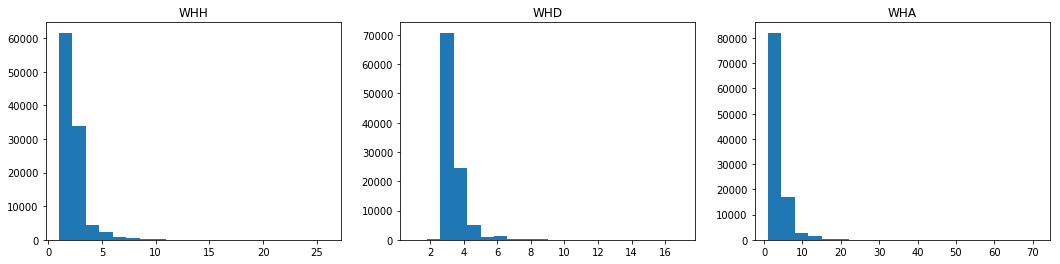

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(18,4), sharey=True)
plt.subplot(1, 3, 1)
plt.hist(ds['WHH'].dropna(), bins=20)
plt.title('WHH')
plt.subplot(1, 3, 2)
plt.hist(ds['WHD'].dropna(), bins=20)
plt.title('WHD')
plt.subplot(1, 3, 3)
plt.hist(ds['WHA'].dropna(), bins=20)
plt.title('WHA')
plt.show()

In [50]:
if os.path.exists(pathdest + filedest):
    os.remove(pathdest + filedest)
    
ds.to_csv(pathdest + filedest, index=None)